In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
df = pd.read_csv("1028_aggregated_median.csv")
e = eval.evaluation(df)
df = e.norm_agg()
name = 'df'

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1280 features were identified


In [3]:
exec(name + "_pre = eval.prec_mean(e.eval(" + name + ", operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [4]:
res = pd.concat([df_enr, df_pre], ignore_index=False, axis=1)
res.to_csv('results.csv')

res

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0.995,0.340169,16.179841,0.0,5.0,0.072441,0.058689
1,0.990,0.259870,10.273556,0.0,10.0,0.057305,0.084698
2,0.985,0.215341,8.046930,0.0,15.0,0.047127,0.100640
3,0.980,0.185769,6.724345,0.0,20.0,0.041645,0.115170
4,0.975,0.163926,5.766416,0.0,25.0,0.037970,0.130240
5,0.970,0.146918,5.184150,0.0,30.0,0.035054,0.142269
6,0.965,0.133832,4.791463,0.0,40.0,0.030293,0.161812
7,0.960,0.123341,4.355060,0.0,50.0,0.026772,0.174690


In [5]:
df_pre_r


0.07011692691933707

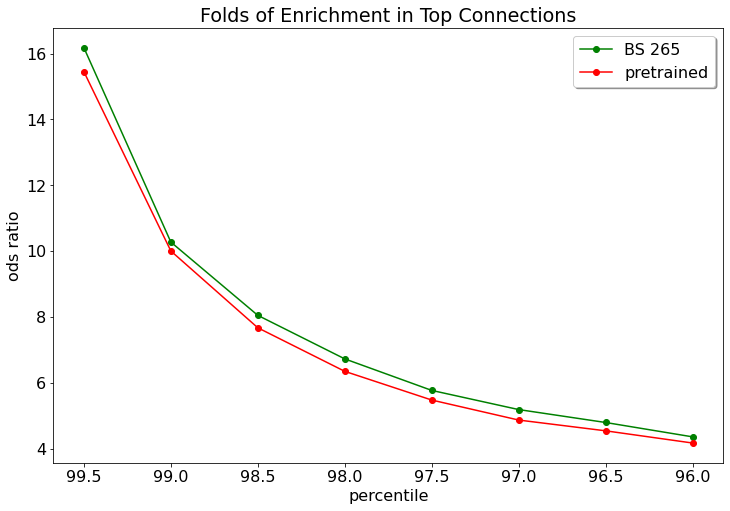

In [6]:
pretrained = pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_enr.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*df_enr["enrichment_percentile"], df_enr["ods_ratio"], marker="o", color="green", label = 'BS 265')
# plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="orange", label = 'BS 64')
# plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="b", label = 'BS 32')
plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()
